# Mineral Indices

\begin{align}
&Iron\ Oxide\ Ratio\ = \frac{RED}{BLUE} \\
\end{align}

\begin{align}
&Ferrous\ Minerals\ Ratio &= \frac{SWIR1}{NIR} \\
\end{align}

\begin{align}
&Clay\ NIR/SWIR\ Ratio &= \frac{NIR}{SWIR} \\
\end{align}

\begin{align}
&Clay\ Minerals\ Ratio &= \frac{SWIR1}{SWIR2} \\
\end{align}

\begin{align}
&Ferruginous\ Regolith\ ratio &
\end{align}



Rat
[[2](http://www.harrisgeospatial.com/docs/BackgroundGeologyIndices.html)]
[[1](http://www.harrisgeospatial.com/docs/BackgroundGeologyIndices.html)]

__Background:__ [Landsat 8](https://landsat.usgs.gov/landsat-8) data is available from April 2013 onwards. 

__Before you run this notebook:__ This notebook uses the dea module. You need to run "module load dea" in a terminal window and then launch jupyter notebooks in the same window so that your notebook can 'see' the dea module.

__What does this notebook do?:__ This notebook runs mineral indices on Landsat 8 data. You can then save the data as a png image, netcdf and geotiff.

__Date:__ May 2018

__Authors:__ Leo Lymburner, Bex Dunn

### Import modules from standard libraries, datacube and files
Select 'Trust this notebook' to import these modules and run the dashboard.

In [26]:
%pylab notebook

import os
from matplotlib import pyplot as plt
import matplotlib.dates
import rasterio
import xarray as xr

#modules for datacube
import datacube
from datacube.helpers import ga_pq_fuser, write_geotiff
from datacube.storage import masking
from datacube.storage.masking import mask_to_dict
from datacube.storage.storage import write_dataset_to_netcdf

# set datacube alias (just a string with what you're doing)
dc = datacube.Datacube(app='dc-Mineral Indices')

# Import external functions from dea-notebooks
sys.path.append(os.path.expanduser('~/dea-notebooks/Scripts/'))
import BandIndices, DEAPlotting, DEADataHandling
from FileDialogs import *

#ignore datacube warnings (needs to be last import statement)
import warnings
warnings.filterwarnings('ignore', module='datacube')

Populating the interactive namespace from numpy and matplotlib


## Edit this cell to choose your area and temporal range
- Date format is yyyy-mm-dd
- 'ls8' is [Landsat 8 OLI](https://landsat.usgs.gov/what-are-band-designations-landsat-satellites)


In [27]:
#Define temporal range
start_of_epoch = '2013-01-01'
end_of_epoch =  '2016-12-31'

#Use this to manually define an upper left/lower right coords
lat_max = -15.2
lat_min = -15.5
lon_max = 128.3
lon_min = 128.6  

query = {'time': (start_of_epoch, end_of_epoch),
         'x' : (lon_min, lon_max),
         'y' : (lat_max, lat_min),
         'crs' : 'EPSG:4326'} #using WGS 84 here

### Load data from [Digital Earth Australia](http://geoscienceaustralia.github.io/digitalearthau/notebooks/DEA_datasets/GettingStartedWithLandSats5-7-8.html)

In [33]:
#call our retrieved xarray dataset ls8_nbart (because we're using nbart see DEA link in heading above)
ls8_nbart, crs, affine = DEADataHandling.load_nbarx(dc=dc, sensor='ls8',query=query)

Loading ls8_nbart_albers
Loaded ls8_nbart_albers
Generating mask ls8_pq_albers
Masked ls8_nbart_albers with ls8_pq_albers and filtered terrain


## Calculate Mineral Indices


In [54]:
iron_oxide_ratio =  BandIndices.geological_indices(ls8_nbart, 'IOR')
ferrous_iron =  BandIndices.geological_indices(ls8_nbart, 'FMR')
clay_nirswir = ls8_nbart.nir/ls8_nbart.swir1

The formula we are using is (red / blue)
The formula we are using is (swir1 / nir)


## Plotting the iron oxide ratio

<IPython.core.display.Javascript object>


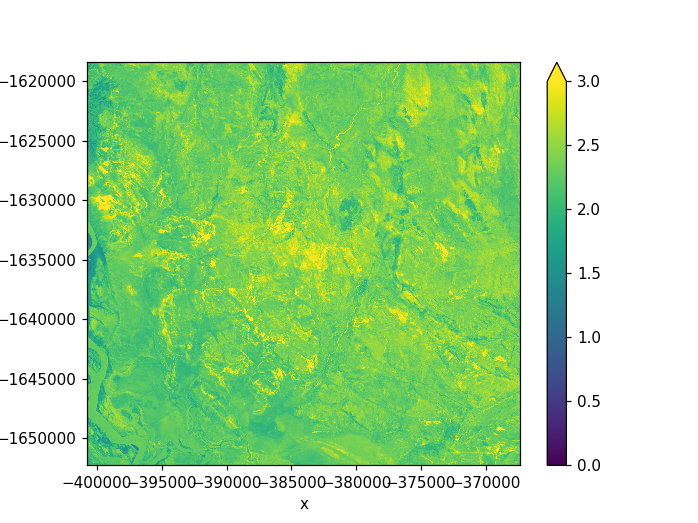

In [52]:
iron_oxide_ratio_stats = iron_oxide_ratio.max(dim = 'time') #you can change .median to .min, .mean, .max
fig = plt.figure()
plt.title('Maximum  Iron Oxide ratio')
iron_oxide_ratio_stats.plot( vmin = 0, vmax = 3)

## Plotting the ferrous iron ratio

<IPython.core.display.Javascript object>


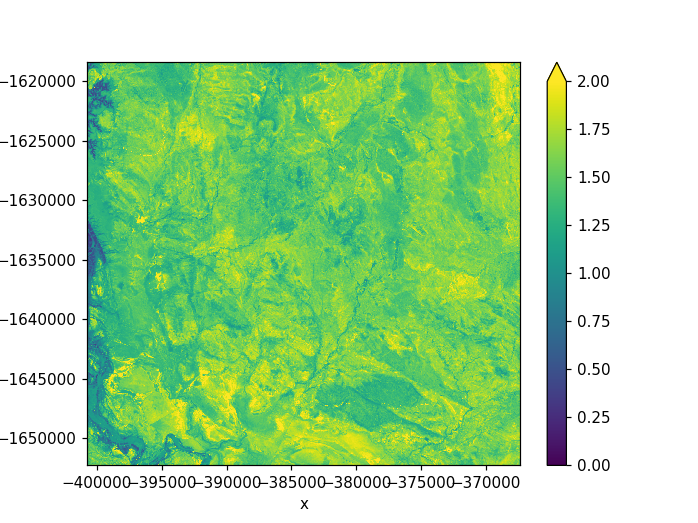

In [53]:
ferrous_iron_stats = ferrous_iron.max(dim = 'time') #you can change .median to .min, .mean, .max
fig = plt.figure()
plt.title('Maximum Ferrous Iron ratio')
ferrous_iron_stats.plot(vmin = 0, vmax  = 2)


In [33]:
#FIXME wtf?
#Calculate annual average NDVI values
#but you'll need to update the code below here accordingly
annual_mean_iron_oxide_ratio = annual_iron_oxide_ratio.median(dim = 'time')

NameError: name 'annual_iron_oxide_ratio' is not defined

## Plotting the Clay NIR/SWIR ratio

In [45]:

clay_nirswir_stats = clay_nirswir.median(dim = 'time') #you can change .median to .min, .mean, .max
fig = plt.figure()
plt.title('Maximum Clay NIR/SWIR ratio')
plt.imshow(clay_nirswir_stats, vmin = 0, vmax = 1.2,
           extent=[iron_oxide_ratio_stats.coords['x'].min(), iron_oxide_ratio_stats.coords['x'].max(), 
                   iron_oxide_ratio_stats.coords['y'].min(), iron_oxide_ratio_stats.coords['y'].max()])

NameError: name 'clay_nirswir' is not defined

## Plotting the Clay SWIR1/SWIR2 ratio

In [44]:

clay_swir1_swir2_stats = clay_swir1_swir2.median(dim = 'time') #you can change .median to .min, .mean, .max
fig = plt.figure()
plt.title('Maximum Clay SWIR1/SWIR2 ratio')
plt.imshow(clay_swir1_swir2_stats, vmin = 0, vmax = 1.6,
           extent=[iron_oxide_ratio_stats.coords['x'].min(), iron_oxide_ratio_stats.coords['x'].max(), 
                   iron_oxide_ratio_stats.coords['y'].min(), iron_oxide_ratio_stats.coords['y'].max()])

NameError: name 'sensor_nbar' is not defined

## Plotting the ferruginous regolith ratio

<IPython.core.display.Javascript object>


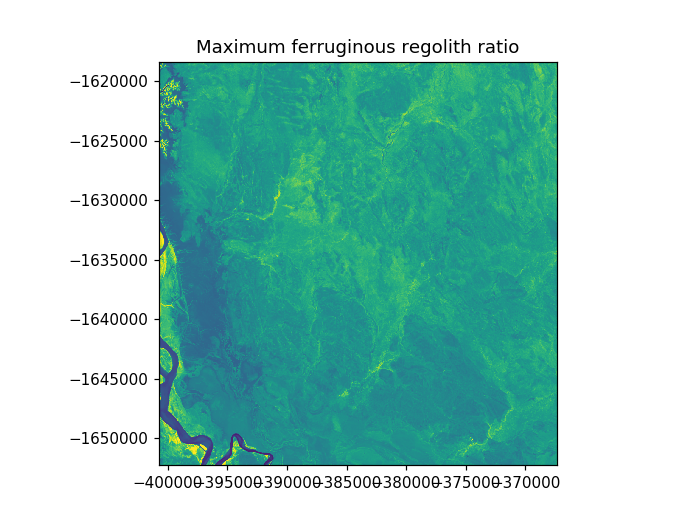

In [57]:
ferruginous_reg = ls8_nbart.nir/ls8_nbart.green
ferruginous_reg_stats = ferruginous_reg.median(dim = 'time') #you can change .median to .min, .mean, .max
fig = plt.figure()
plt.title('Maximum ferruginous regolith ratio')
plt.imshow(ferruginous_reg_stats, vmin = 0, vmax = 5,
           extent=[iron_oxide_ratio_stats.coords['x'].min(), iron_oxide_ratio_stats.coords['x'].max(), 
                   iron_oxide_ratio_stats.coords['y'].min(), iron_oxide_ratio_stats.coords['y'].max()])

## Save ratios to netCDF

In [15]:
#make a list to write the stats to netCDF
stats = [iron_oxide_ratio_stats,ferrous_iron_stats,clay_nirswir_stats,clay_swir1_swir2_stats,ferruginous_reg_stats]
stats_names = ['iron_oxide_ratio_stats','ferrous_iron_stats','clay_nirswir_stats','clay_swir1_swir2_stats','ferruginous_reg_stats']

In [16]:
#set up a loop to write each data array to dataset, add the crs to make a proper netcdf, then write our netcdf
for stat in range(len(stats)):
    #turn array into dataset so we can write the netcdf
    dataset = stats[stat].to_dataset(name=stats_names[stat])
    #grab our crs attributes to write a spatially-referenced netcdf
    dataset.attrs['crs'] =  sensor_nbar.crs
    try:
        write_dataset_to_netcdf(dataset, stats_names[stat]+'.nc')
    #complain if the file already exists but don't fail    
    except RuntimeError as err:
        print("RuntimeError: {0}".format(err))
    print('wrote ', stats_names[stat], ' to netCDF' )

RuntimeError: Storage Unit already exists: iron_oxide_ratio_stats.nc
wrote  iron_oxide_ratio_stats  to netCDF
RuntimeError: Storage Unit already exists: ferrous_iron_stats.nc
wrote  ferrous_iron_stats  to netCDF
wrote  clay_nirswir_stats  to netCDF
wrote  clay_swir1_swir2_stats  to netCDF
wrote  ferruginous_reg_stats  to netCDF


## convert netCDFs to geotiff 
### you can edit the (commented out) gdalwarp line to increase/decrease the compression, or simply run the following script to turn all your netcdf files into tiff files

In [17]:
#run this for each file - gdalwarp: resolution, output as geotiff, compress a bit,
#!gdalwarp -tr 25.0 25.0 -of GTiff -co "ZLEVEL=1" -co 'COMPRESS=DEFLATE' -co "PREDICTOR=3" [filename.nc] [filename.tif]
#or you could just do this instead:
!gdalwarp *.nc *.tif

Processing input file clay_nirswir_stats.nc.
Using internal nodata values (e.g. 9.96921e+36) for image clay_nirswir_stats.nc.
0...10...20...30...40...50...60...70...80...90...100 - done.
Processing input file clay_swir1_swir2_stats.nc.
Using internal nodata values (e.g. 9.96921e+36) for image clay_swir1_swir2_stats.nc.
0...10...20...30...40...50...60...70...80...90...100 - done.
Processing input file ferrous_iron_stats.nc.
Using internal nodata values (e.g. 9.96921e+36) for image ferrous_iron_stats.nc.
0...10...20...30...40...50...60...70...80...90...100 - done.
Processing input file ferruginous_reg_stats.nc.
Using internal nodata values (e.g. 9.96921e+36) for image ferruginous_reg_stats.nc.
0...10...20...30...40...50...60...70...80...90...100 - done.
Processing input file iron_oxide_ratio_stats.nc.
Using internal nodata values (e.g. 9.96921e+36) for image iron_oxide_ratio_stats.nc.
0...10...20...30...40...50...60...70...80...90...100 - done.


## References

In [ ]:
CMR: Drury, S. Image Interpretation in Geology. London: Allen and Unwin (1987), 243 pp.
FMR: Drury+ Segal, D. "Theoretical Basis for Differentiation of Ferric-Iron Bearing Minerals, Using Landsat MSS Data." Proceedings of Symposium for Remote Sensing of Environment, 2nd Thematic Conference on Remote Sensing for Exploratory Geology, Fort Worth, TX (1982): 949-951.   
IOR: Drury + Segal, D. "Theoretical Basis for Differentiation of Ferric-Iron Bearing Minerals, Using Landsat MSS Data." Proceedings of Symposium for Remote Sensing of Environment, 2nd Thematic Conference on Remote Sensing for Exploratory Geology, Fort Worth, TX (1982): pp. 949-951.
FRR:     Wilford and Creasy
        